# Keras Syntax Basics

Our main goal is to predict the price of the gem stone based on the features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


# Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


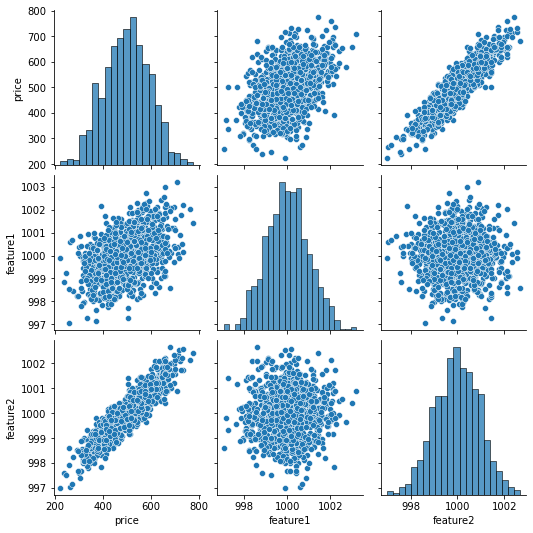

In [6]:
sns.pairplot(df);

# Test/Train Split

In [7]:
# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

# Normalizing/Scaling the Data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
scaled_X_train[:5]

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       [0.52955895, 0.93551377],
       [0.52907398, 0.39249753]])

In [15]:
scaled_X_train.min(), scaled_X_train.max()

(0.0, 1.0)

-------

# TensorFlow 2.0 Syntax

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### There are two ways to create keras based model.

## Approach 1) Model - as a list of layers

In [17]:
model = Sequential([Dense(4, activation='relu'), # input layer
                   Dense(2, activation='relu'), # hidden layer
                   Dense(1)]) #output layer

## Approach 2) Model - adding in layers one by one

Preferred one

In [18]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

----------
Let's go ahead and build a simple model and then compile it by defining our solver

In [19]:
model = Sequential()

In [20]:
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

# Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

Note: For optimizer, we can use whatever optimizer we like.

-----
For a **multi-class classification** problem

model.compile(optimizer='rmsprop',
              loss=`'categorical_crossentropy'`,
              metrics=['accuracy'])

----

For a **binary classification** problem

model.compile(optimizer='rmsprop',
              loss=`'binary_crossentropy'`,
              metrics=['accuracy'])

-----
For a mean squared error **regression** problem

model.compile(optimizer='rmsprop',
              loss=`'mse'`)

                 

-----

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [21]:
model.fit(scaled_X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 257002.4531
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256779.4219
Epoch 3/250
22/22 [==============================] - 0s 710us/step - loss: 256581.6406
Epoch 4/250
22/22 [==============================] - 0s 710us/step - loss: 256408.5000
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256243.5156
Epoch 6/250
22/22 [==============================] - 0s 710us/step - loss: 256066.3750
Epoch 7/250
22/22 [==============================] - 0s 710us/step - loss: 255865.3438
Epoch 8/250
22/22 [==============================] - 0s 710us/step - loss: 255635.6094
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255374.3750
Epoch 10/250
22/22 [==============================] - 0s 710us/step - loss: 255074.8281
Epoch 11/250
22/22 [==============================] - 0s 710us/step - loss: 254735.9062
Epoch 12/250
22/22 [=============================

Epoch 96/250
22/22 [==============================] - 0s 710us/step - loss: 1952.2345
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 1917.0979
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 1886.1288
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 1853.2542
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 1818.9294
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 1782.1636
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 1750.0078
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1716.6573
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 1689.6346
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1656.5671
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 1627.9664
Epoch 107/250
22/22 [==============================] - 0s 710us/ste

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [22]:
loss_df = pd.DataFrame(model.history.history)

In [23]:
loss_df.head()

,loss
0,257002.453125
1,256779.421875
2,256581.640625
3,256408.500000
4,256243.515625


<AxesSubplot:>

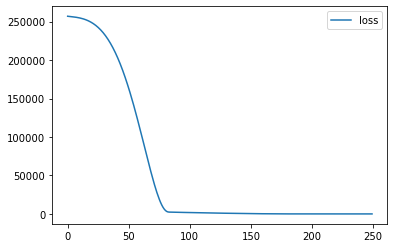

In [24]:
loss_df.plot()

------

# Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [28]:
model.metrics_names

['loss']

In [31]:
training_score = model.evaluate(scaled_X_train,y_train,verbose=0)
test_score = model.evaluate(scaled_X_test,y_test,verbose=0)

In [32]:
training_score, test_score

(23.736896514892578, 25.223438262939453)

# Further Evaluations

In [33]:
predictions = model.predict(scaled_X_test)

In [34]:
predictions[:5]

array([[405.6027 ],
       [624.0807 ],
       [592.64374],
       [572.70544],
       [366.87323]], dtype=float32)

In [37]:
# predictions reshape as panadas series

predictions = pd.Series(predictions.reshape(300,))
predictions

0      405.602692
1      624.080688
2      592.643738
3      572.705444
4      366.873230
          ...    
295    529.480286
296    515.733521
297    610.180115
298    417.287659
299    411.188568
Length: 300, dtype: float32

In [39]:
# Creating dataframe (combniation of True Y Value vs predictions)

pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [41]:
pred_df = pd.concat([pred_df, predictions], axis=1)
pred_df.head()

,Test True Y,0
0,402.296319,405.602692
1,624.156198,624.080688
2,582.455066,592.643738
3,578.588606,572.705444
4,371.224104,366.873230


In [43]:
pred_df.columns=['Test True Y', 'Model Predictions']
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.602692
1,624.156198,624.080688
2,582.455066,592.643738
3,578.588606,572.705444
4,371.224104,366.873230


### Visualize the data

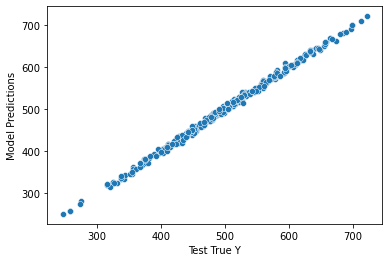

In [44]:
sns.scatterplot(data=pred_df, x='Test True Y', y='Model Predictions');

For the ideal scenarios, the line will be overlapped (predictions and true y value) and we will see Perfect Stright line.

--------

In [55]:
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

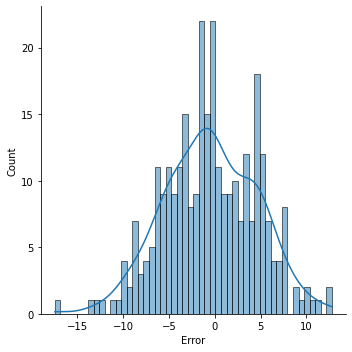

In [58]:
sns.displot(pred_df['Error'], bins=50, kde=True);

-------

# MAE, MSE, RMSE

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
MAE = mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])
MAE

4.033680617406285

In [48]:
MSE = mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])
MSE

25.223442306176228

In [50]:
# MSE value and the value we got from evaluate() method are esentially the same thing, difference just due to precision
test_score

25.223438262939453

In [51]:
RMSE = np.sqrt(MSE)
RMSE

5.022294526028539

## How do we know if this MAE is good or bad?

We can compare this to mean value of the actual distribution of dataset itself.

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


We can see the average price is 498.67 minimum is 223.34 and max of 774.40\$.

Based on our model prediction, MAE (on average how far we are off) is 4.03$ (less than 1%) which is pretty good.

In [54]:
100* 4.03 / 498.67

0.8081496781438626

----------

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [60]:
# [[Feature1, Feature2]]
new_gem = [[998, 1000]]

As our model is trained on scaled data, we need to scaled our new data too.

In [62]:
new_gem = scaler.transform(new_gem)

In [63]:
model.predict(new_gem)

array([[419.9999]], dtype=float32)

Our model predicts that new gem we pick up is around 419\$.

-----

# Saving and Loading a Model

In [65]:
from tensorflow.keras.models import load_model

In [70]:
model.save('models/my_gem_model.h5')

Load the saved model and make some predictions.

In [71]:
loaded_model = load_model('models/my_gem_model.h5')

In [72]:
loaded_model.predict(new_gem)

array([[419.9999]], dtype=float32)